# **Analisis Faktor Stres Pelajar**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/student-stress-factors-a-comprehensive-analysis/StressLevelDataset.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# **Define Questions**
Research question:

**Descriptive Statistics:**
1. Berapa jumlah siswa dalam dataset?
2. Berapa rata-rata tingkat kecemasan siswa dalam dataset?
3. Berapa banyak siswa yang melaporkan memiliki riwayat masalah kesehatan mental?
**Psychological Factors:**
1. Berapa banyak siswa yang memiliki tingkat harga diri di bawah rata-rata?
2. Berapa persentase siswa yang melaporkan mengalami depresi?
**Physiological Factors:**
1. Berapa banyak siswa yang sering mengalami sakit kepala?
2. Berapa rata-rata tekanan darah di antara para siswa?
3. Berapa banyak siswa yang menilai kualitas tidurnya buruk?
**Environmental Factors:**
1. Berapa banyak siswa yang tinggal di lingkungan dengan tingkat kebisingan tinggi?
2. Berapa persentase siswa yang merasa tidak aman di tempat tinggal mereka?
3. Berapa banyak siswa yang melaporkan bahwa kebutuhan dasar mereka tidak terpenuhi?
**Academic Factors:**
1. Berapa banyak siswa yang menilai kinerja akademis mereka di bawah rata-rata?
2. Berapa rata-rata beban belajar yang dilaporkan oleh siswa?
3. Berapa banyak siswa yang memiliki kekhawatiran tentang karier masa depan mereka?
**Social Factors:**
1. Berapa banyak siswa yang merasa memiliki dukungan sosial yang kuat?
2. Berapa persentase siswa yang pernah mengalami bullying?
3. Berapa banyak siswa yang berpartisipasi dalam kegiatan ekstrakurikuler?
**Comparative Analysis:**
1. Apakah ada korelasi antara tingkat kecemasan dan kinerja akademis?
2. Apakah siswa yang memiliki kualitas tidur buruk juga melaporkan tingkat depresi yang lebih tinggi?
3. Apakah siswa yang mengalami bullying lebih mungkin memiliki riwayat masalah kesehatan mental?
**General Exploration:**
1. Faktor mana (Psikologis, Fisiologis, Lingkungan, Akademis, Sosial) yang memiliki jumlah siswa terbanyak yang melaporkan pengalaman atau kondisi negatif?
2. Apakah ada tren atau pola yang terlihat saat membandingkan berbagai faktor?
3. Fitur spesifik mana dalam setiap faktor yang memiliki dampak paling signifikan terhadap stres siswa, berdasarkan dataset?

# **Data Wragling**

In [3]:
df = pd.read_csv('/kaggle/input/student-stress-factors-a-comprehensive-analysis/StressLevelDataset.csv')
df.head()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,...,3,4,3,1,2,1,5,0,5,1


# **Preprocessing Data**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   anxiety_level                 1100 non-null   int64
 1   self_esteem                   1100 non-null   int64
 2   mental_health_history         1100 non-null   int64
 3   depression                    1100 non-null   int64
 4   headache                      1100 non-null   int64
 5   blood_pressure                1100 non-null   int64
 6   sleep_quality                 1100 non-null   int64
 7   breathing_problem             1100 non-null   int64
 8   noise_level                   1100 non-null   int64
 9   living_conditions             1100 non-null   int64
 10  safety                        1100 non-null   int64
 11  basic_needs                   1100 non-null   int64
 12  academic_performance          1100 non-null   int64
 13  study_load                    110

In [5]:
df.isna().sum()

anxiety_level                   0
self_esteem                     0
mental_health_history           0
depression                      0
headache                        0
blood_pressure                  0
sleep_quality                   0
breathing_problem               0
noise_level                     0
living_conditions               0
safety                          0
basic_needs                     0
academic_performance            0
study_load                      0
teacher_student_relationship    0
future_career_concerns          0
social_support                  0
peer_pressure                   0
extracurricular_activities      0
bullying                        0
stress_level                    0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.describe()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,...,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000
mean,11.063636,17.777273,0.492727,12.555455,2.508182,2.181818,2.660000,2.753636,2.649091,2.518182,...,2.772727,2.772727,2.621818,2.648182,2.649091,1.881818,2.734545,2.767273,2.617273,0.996364
std,6.117558,8.944599,0.500175,7.727008,1.409356,0.833575,1.548383,1.400713,1.328127,1.119208,...,1.433761,1.414594,1.315781,1.384579,1.529375,1.047826,1.425265,1.417562,1.530958,0.821673
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,11.000000,0.000000,6.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,0.000000
50%,11.000000,19.000000,0.000000,12.000000,3.000000,2.000000,2.500000,3.000000,3.000000,2.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.500000,3.000000,1.000000
75%,16.000000,26.000000,1.000000,19.000000,3.000000,3.000000,4.000000,4.000000,3.000000,3.000000,...,4.000000,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,2.000000
max,21.000000,30.000000,1.000000,27.000000,5.000000,3.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,5.000000,5.000000,5.000000,2.000000


# **Exploratory Data Analysis (EDA)**

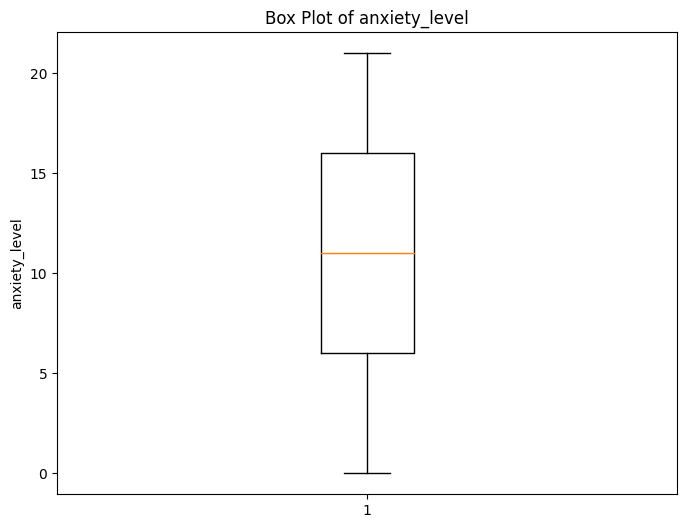

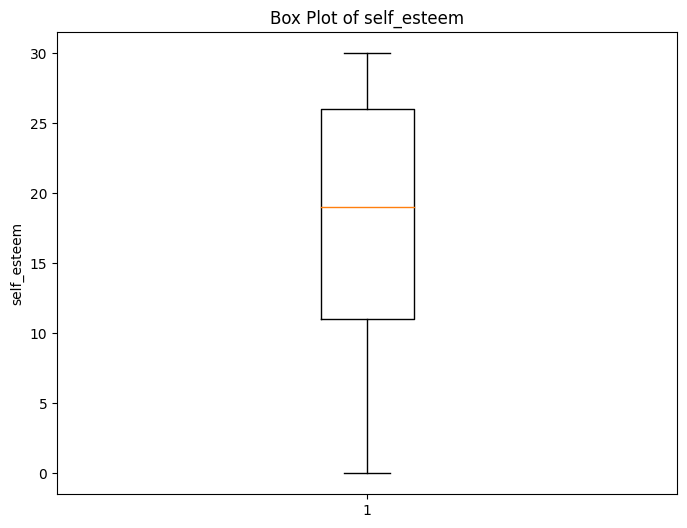

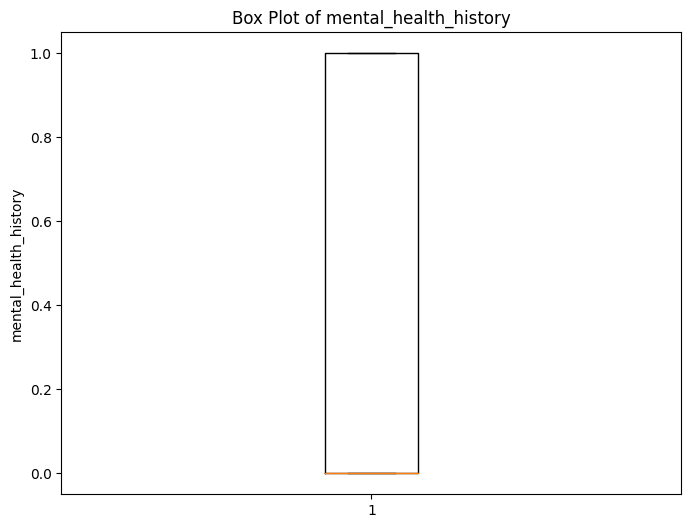

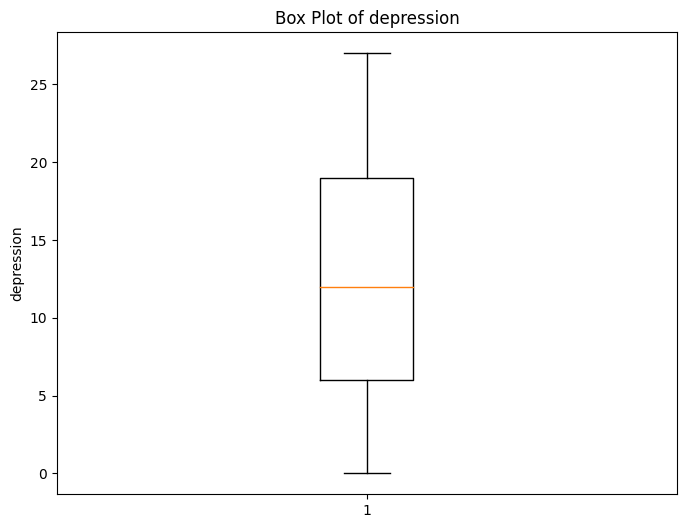

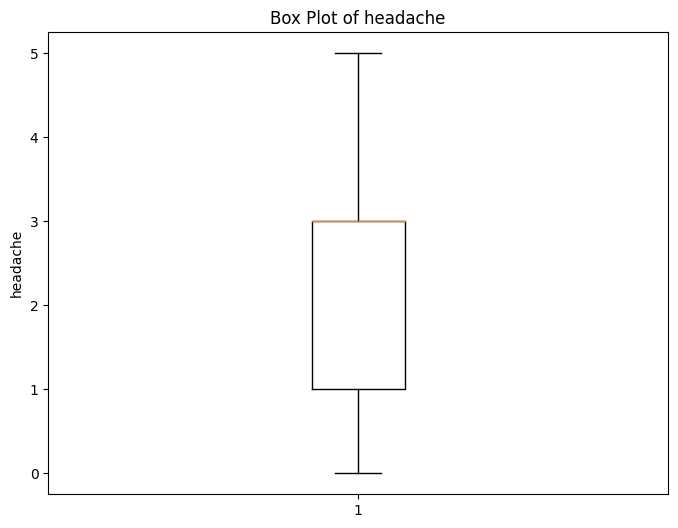

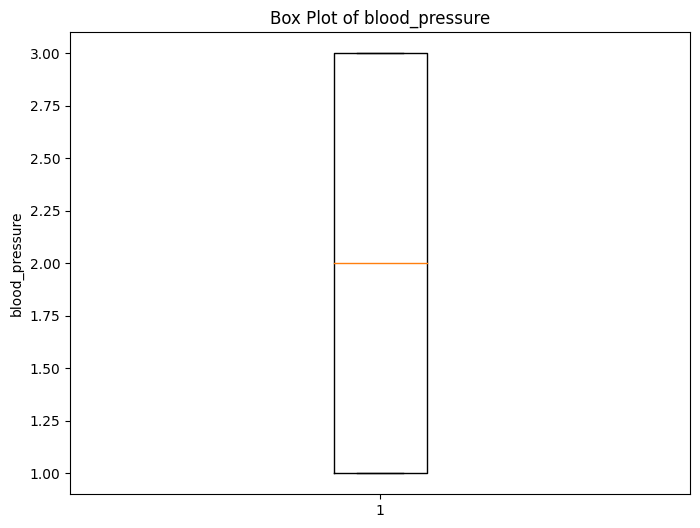

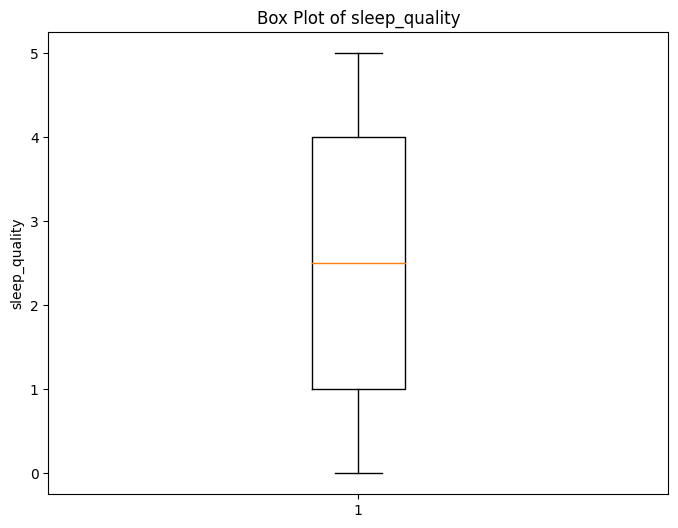

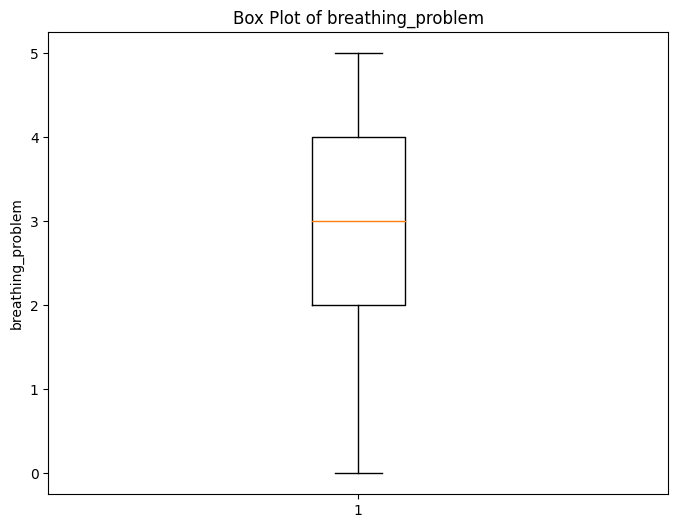

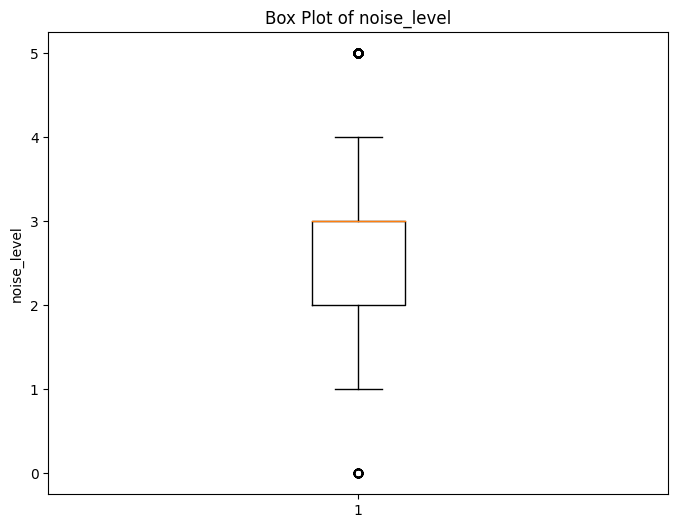

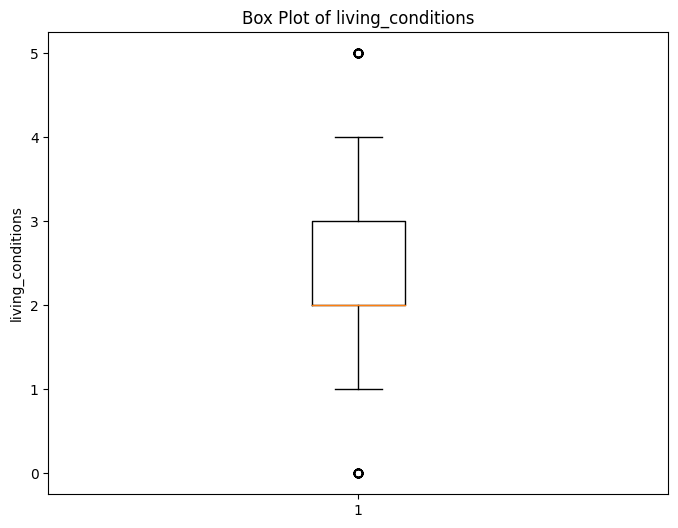

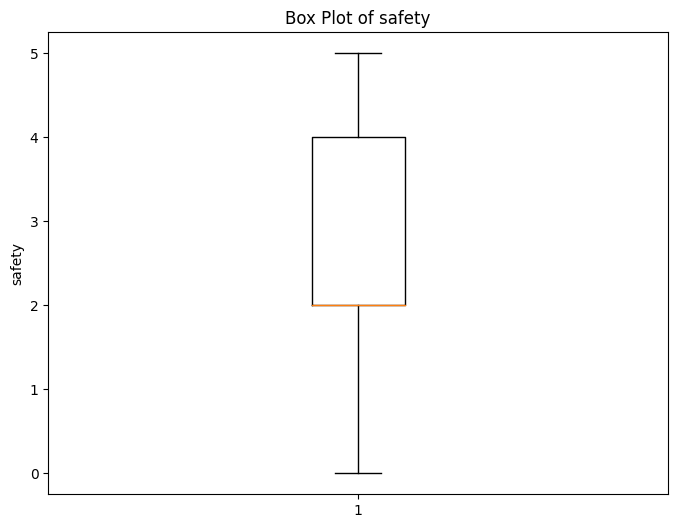

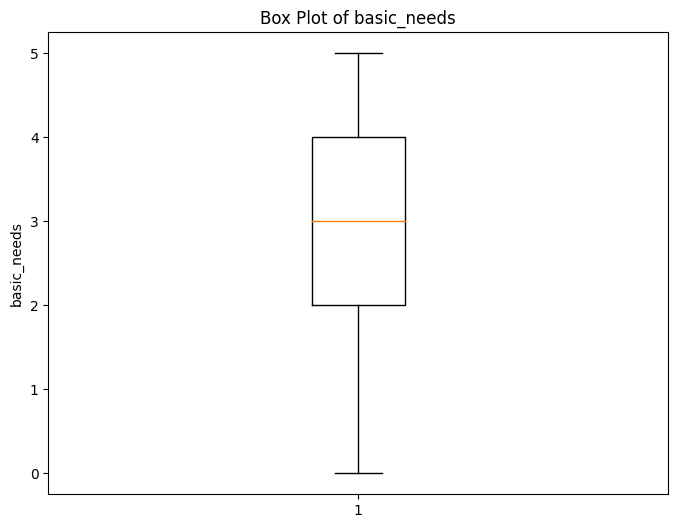

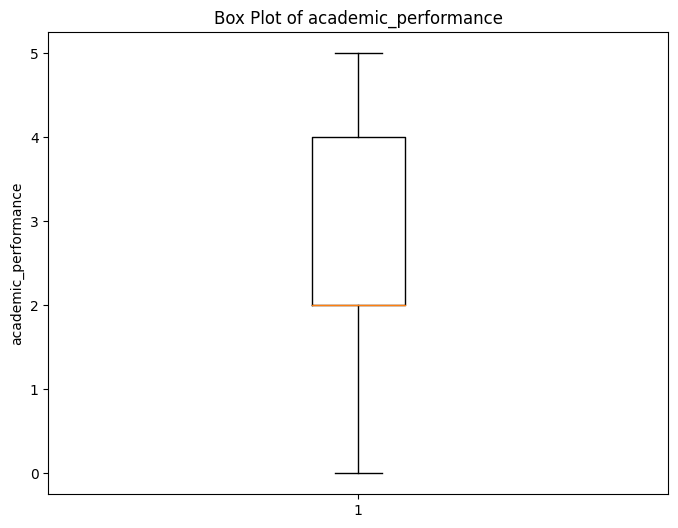

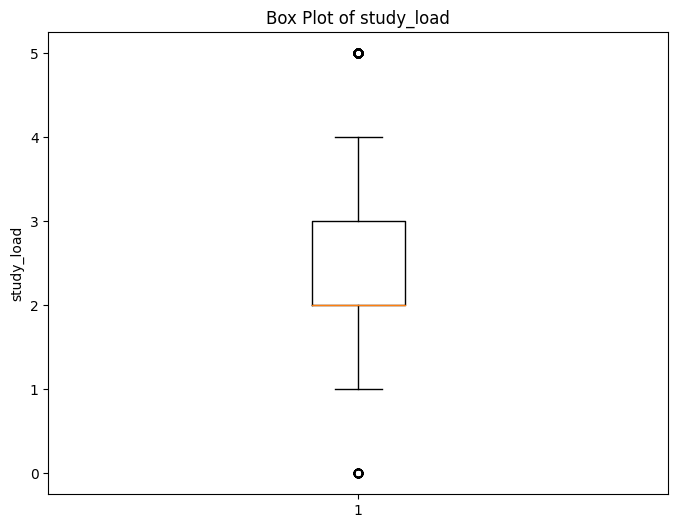

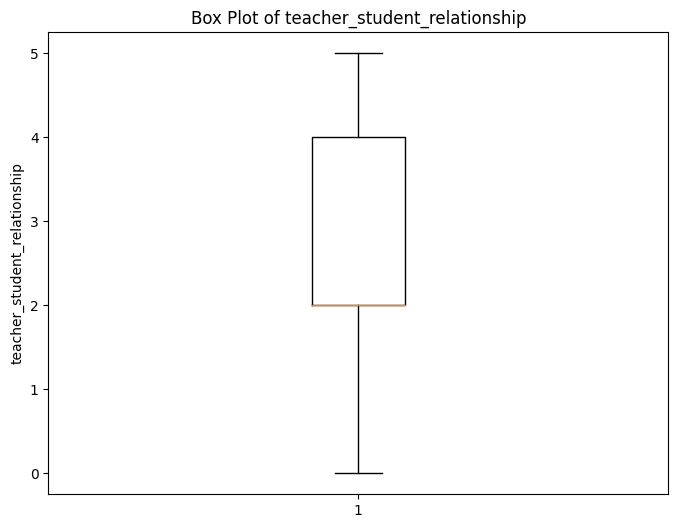

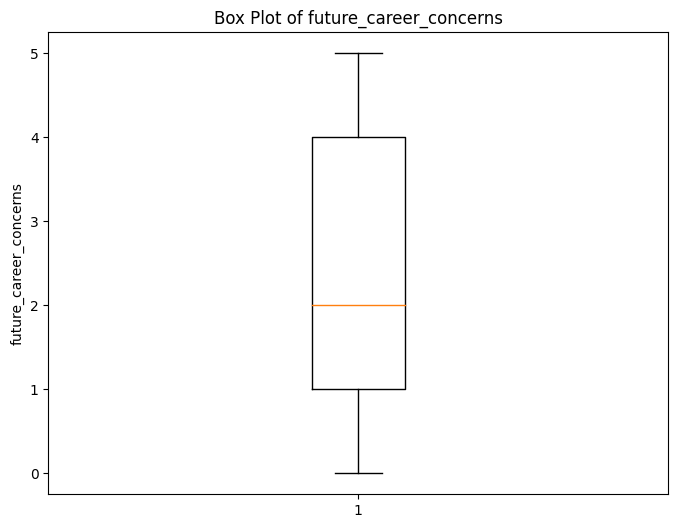

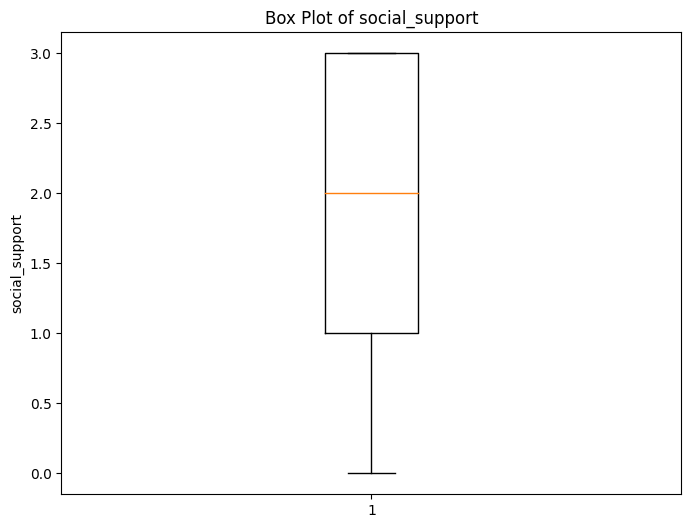

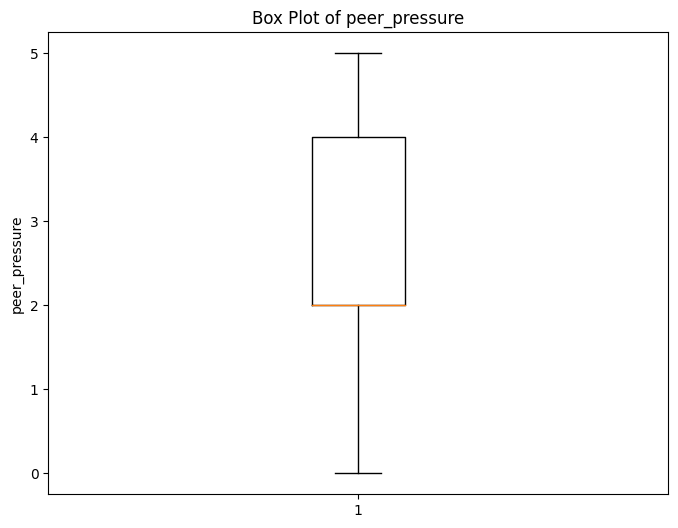

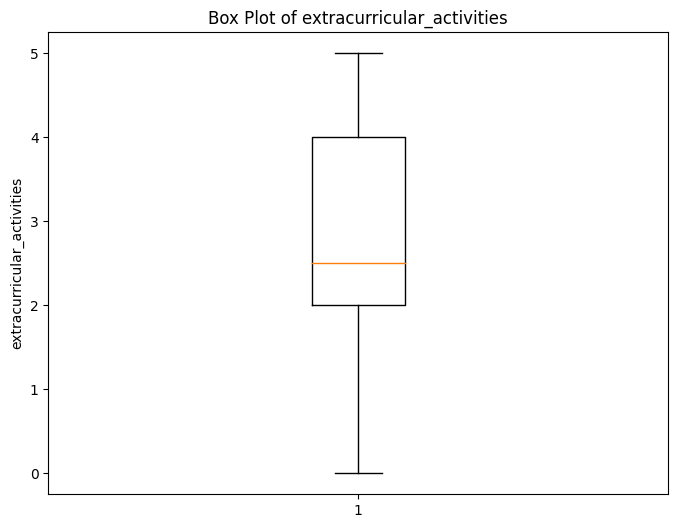

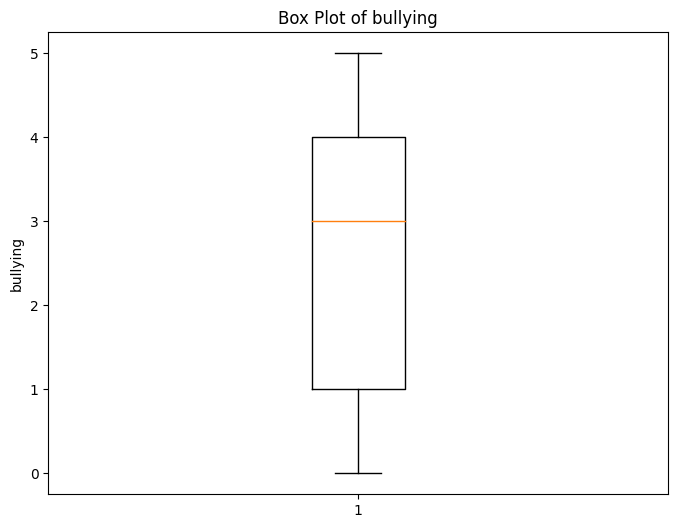

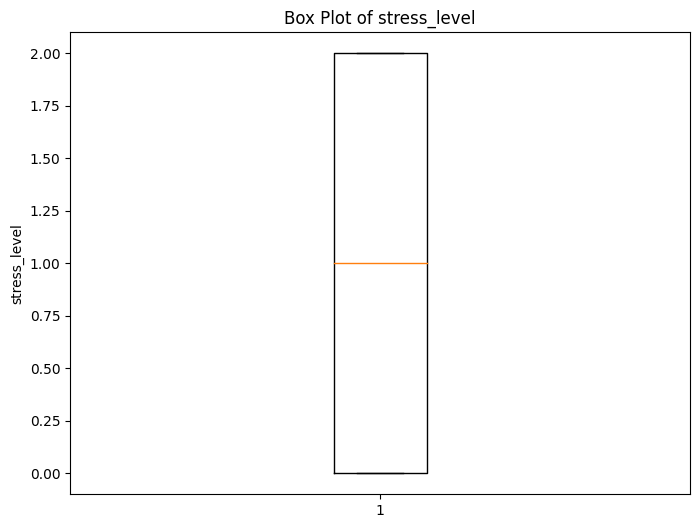

In [8]:
# Create box plots for each numerical column
for column in df:
  plt.figure(figsize=(8, 6))
  plt.boxplot(df[column])
  plt.title(f'Box Plot of {column}')
  plt.ylabel(column)
  plt.show()

# **Remove Outliner**

In [9]:
outliers_index = []

for column in df:
    # Calculate IQR for price
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Identify outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    
    for idx in outliers.index:
        if idx not in outliers_index:
            outliers_index.append(idx)
    
    print(f"Number of outliers in {column}: {len(outliers)}")

Number of outliers in anxiety_level: 0
Number of outliers in self_esteem: 0
Number of outliers in mental_health_history: 0
Number of outliers in depression: 0
Number of outliers in headache: 0
Number of outliers in blood_pressure: 0
Number of outliers in sleep_quality: 0
Number of outliers in breathing_problem: 0
Number of outliers in noise_level: 173
Number of outliers in living_conditions: 62
Number of outliers in safety: 0
Number of outliers in basic_needs: 0
Number of outliers in academic_performance: 0
Number of outliers in study_load: 165
Number of outliers in teacher_student_relationship: 0
Number of outliers in future_career_concerns: 0
Number of outliers in social_support: 0
Number of outliers in peer_pressure: 0
Number of outliers in extracurricular_activities: 0
Number of outliers in bullying: 0
Number of outliers in stress_level: 0


In [10]:
# df = df.drop(outliers_index)
# df.describe()

# **Answering Questions**

**Jawaban Statistik Deskriptif**

In [11]:
student_total = len(df)
print(f"No. 1.Jumlah siswa dalam dataset: {student_total}")

No. 1.Jumlah siswa dalam dataset: 1100


In [12]:
anxiety_mean = df['anxiety_level'].mean()
print(f"No. 2.Rata-rata tingkat kecemasan siswa dalam dataset: {anxiety_mean}")

No. 2.Rata-rata tingkat kecemasan siswa dalam dataset: 11.063636363636364


In [13]:
mental_health_history = len(df[df['mental_health_history'] == 1])
print(f"No. 3.Banyak siswa yang melaporkan memiliki riwayat masalah kesehatan mental: {mental_health_history}")

No. 3.Banyak siswa yang melaporkan memiliki riwayat masalah kesehatan mental: 542


**Jawaban Faktor Psikologis**

In [14]:
self_esteem_mean = df['self_esteem'].mean()
under_self_esteem_mean = df[df['self_esteem'] < self_esteem_mean]
under_self_esteem_mean = len(under_self_esteem_mean)
print(f"No. 1.Banyak siswa yang memiliki tingkat harga diri di bawah rata-rata: {under_self_esteem_mean}")

No. 1.Banyak siswa yang memiliki tingkat harga diri di bawah rata-rata: 507


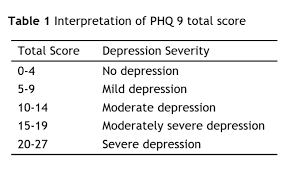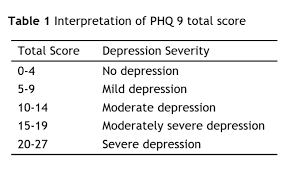

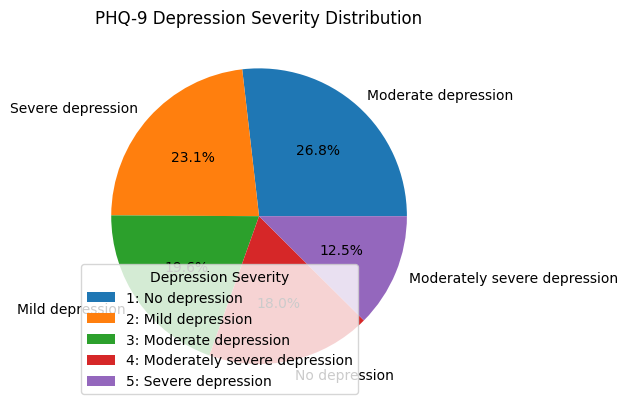

depression
3    295
5    254
2    216
1    198
4    137
Name: count, dtype: int64


In [15]:
def categorize_phq9(score):
    if 0 <= score <= 4:
        return 1  # No depression
    elif 5 <= score <= 9:
        return 2  # Mild depression
    elif 10 <= score <= 14:
        return 3  # Moderate depression
    elif 15 <= score <= 19:
        return 4  # Moderately severe depression
    elif 20 <= score <= 27:
        return 5  # Severe depression
    else:
        return 0  # Invalid score

# Tambahkan kolom kategori berdasarkan skor
df['depression'] = df['depression'].apply(categorize_phq9)

# Hitung frekuensi setiap kategori
category_counts = df['depression'].value_counts()

# Mapping kategori integer ke label string
category_labels = {
    1: 'No depression',
    2: 'Mild depression',
    3: 'Moderate depression',
    4: 'Moderately severe depression',
    5: 'Severe depression'
}

# Buat list label untuk pie chart
labels = [category_labels[i] for i in category_counts.index if i in category_labels]

# Membuat pie chart
plt.pie(category_counts, labels=labels, autopct='%1.1f%%')
plt.title('PHQ-9 Depression Severity Distribution')
plt.legend(title="Depression Severity", labels=[f"{i}: {category_labels[i]}" for i in category_labels.keys()])
plt.show()

# Tampilkan jumlah setiap kategori
print(category_counts)

**Jawaban Faktor Fisiologis**

In [16]:
headache_total = len(df[df['headache'] >= 4])
print(f"No. 1.Banyak siswa yang sering mengalami sakit kepala: {headache_total}")

No. 1.Banyak siswa yang sering mengalami sakit kepala: 269


In [17]:
blood_pressure_mean = df['blood_pressure'].mean()
print(f"No. 2.Rata-rata tekanan darah di antara para siswa: {blood_pressure_mean}")

No. 2.Rata-rata tekanan darah di antara para siswa: 2.1818181818181817


In [18]:
bad_sleep_quality = len(df[df['sleep_quality'] <=2])
print(f"Ketegori kualitas tidur\n1: Sangat buruk\n2: Buruk\n3: Cukup\n4: Baik\n5: Sangat baik\nNo. 3.Banyak siswa yang menilai kualitas tidurnya buruk: {bad_sleep_quality}")

Ketegori kualitas tidur
1: Sangat buruk
2: Buruk
3: Cukup
4: Baik
5: Sangat baik
No. 3.Banyak siswa yang menilai kualitas tidurnya buruk: 550


**Jawaban Faktor Lingkungan**

In [19]:
noise_level_total = len(df[df['noise_level'] >= 4])
print(f"Ketegori tingkat kebisingan\n1: Sangat Rendah\n2: Rendah\n3: Normal\n4: Tinggi\n5: Sangat Tinggi\nNo. 1.Banyak siswa yang tinggal di lingkungan dengan tingkat kebisingan tinggi: {noise_level_total}")

Ketegori tingkat kebisingan
1: Sangat Rendah
2: Rendah
3: Normal
4: Tinggi
5: Sangat Tinggi
No. 1.Banyak siswa yang tinggal di lingkungan dengan tingkat kebisingan tinggi: 274


In [20]:
living_conditions_total = len(df[df['living_conditions'] <=2])
print(f"Ketegori tempat tinggal\n1: Sangat buruk\n2: Buruk\n3: Cukup\n4: Baik\n5: Sangat baik\nNo. 2.Persentase siswa yang merasa tidak aman di tempat tinggal mereka: {living_conditions_total}")

Ketegori tempat tinggal
1: Sangat buruk
2: Buruk
3: Cukup
4: Baik
5: Sangat baik
No. 2.Persentase siswa yang merasa tidak aman di tempat tinggal mereka: 551


In [21]:
basic_needs_total = len(df[df['basic_needs'] <=2])
print(f"Ketegori kebutuhan dasar\n1: Sangat buruk\n2: Buruk\n3: Cukup\n4: Baik\n5: Sangat baik\nNo. 3.Banyak siswa yang melaporkan bahwa kebutuhan dasar mereka tidak terpenuhi: {basic_needs_total}")

Ketegori kebutuhan dasar
1: Sangat buruk
2: Buruk
3: Cukup
4: Baik
5: Sangat baik
No. 3.Banyak siswa yang melaporkan bahwa kebutuhan dasar mereka tidak terpenuhi: 548


**Jawaban Faktor Akademis**

In [22]:
academic_performance_mean = df['academic_performance'].mean()
academic_performance_mean = len(df[df['academic_performance'] < academic_performance_mean])
print(f"Ketegori kinerja akademis\n1: Sangat buruk\n2: Buruk\n3: Cukup\n4: Baik\n5: Sangat baik\nNo. 1.Siswa yang menilai kinerja akademis mereka di bawah rata-rata: {academic_performance_mean}")

Ketegori kinerja akademis
1: Sangat buruk
2: Buruk
3: Cukup
4: Baik
5: Sangat baik
No. 1.Siswa yang menilai kinerja akademis mereka di bawah rata-rata: 561


In [23]:
study_load_mean = df['study_load'].mean()
print(f"No. 2.Rata-rata beban belajar yang dilaporkan oleh siswa: {study_load_mean}")

No. 2.Rata-rata beban belajar yang dilaporkan oleh siswa: 2.6218181818181816


In [24]:
future_career_total = len(df[df['future_career_concerns'] >=1])
print(f"No. 3.Siswa yang memiliki kekhawatiran tentang karier masa depan mereka: {future_career_total}")

No. 3.Siswa yang memiliki kekhawatiran tentang karier masa depan mereka: 1070


**Jawaban Faktor Sosial**

In [25]:
strong_social_support = len(df[df['social_support'] == 3])
print(f"No. 1.Banyak siswa yang merasa memiliki dukungan sosial yang kuat: {strong_social_support}")

No. 1.Banyak siswa yang merasa memiliki dukungan sosial yang kuat: 458


In [26]:
bullying_total = len(df[df['bullying'] >=1])
print(f"No. 2.Persentase siswa yang pernah mengalami bullying: {bullying_total}")

No. 2.Persentase siswa yang pernah mengalami bullying: 1061


In [27]:
extracurricular_total = len(df[df['extracurricular_activities'] >=1])
print(f"No. 2.Banyak siswa yang berpartisipasi dalam kegiatan ekstrakurikule: {extracurricular_total}")

No. 2.Banyak siswa yang berpartisipasi dalam kegiatan ekstrakurikule: 1066


# **Create Machine Learning Models**

In [28]:
# Pisahkan fitur dan target dari dataset
X = df.drop(columns=['stress_level'])  # Fitur-fitur
y = df['stress_level']  # Target

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

In [30]:
# Membuat model SVM
svm_model = SVC()
# Melatih model SVM pada data latih
svm_model.fit(X_train, y_train)
# Melakukan prediksi pada data uji
svm_y_pred = svm_model.predict(X_test)

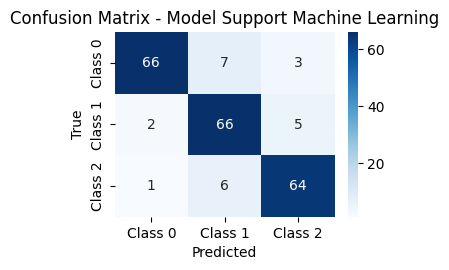

In [31]:
# Plot confusion matrix untuk model kedua
svm_cm = confusion_matrix(y_test, svm_y_pred)
plt.subplot(2, 2, 2)
sns.heatmap(svm_cm, annot=True, cmap='Blues', fmt='g',
            xticklabels=['Class 0', 'Class 1', 'Class 2'],
            yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Model Support Machine Learning')

plt.tight_layout()
plt.show()

In [32]:
# Membuat laporan klasifikasi untuk model kedua
report_model2 = classification_report(y_test, svm_y_pred)
print("\nLaporan Klasifikasi Algoritma Support Vector Machine:")
print(report_model2)


Laporan Klasifikasi Algoritma Support Vector Machine:
              precision    recall  f1-score   support

           0       0.96      0.87      0.91        76
           1       0.84      0.90      0.87        73
           2       0.89      0.90      0.90        71

    accuracy                           0.89       220
   macro avg       0.89      0.89      0.89       220
weighted avg       0.89      0.89      0.89       220

